### Problem Statement Perform clustering (Hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters
- Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

- It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

- Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = "C:/Users/tusha/Downloads/Clustering/Clustering/EastWestAirlines.xlsx"
# Load the excel file 
excel_file = pd.ExcelFile(file_path)
# List all sheet names
sheet_names = excel_file.sheet_names
print(sheet_names)
# Load the second sheet (index 1)
data = pd.read_excel(file_path,sheet_name=sheet_names[1])

['Description', 'data']


In [4]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True)

In [6]:
data.set_index('ID',inplace=True)

In [7]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Data Description
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

- ID --Unique ID

- Balance--Number of miles eligible for award travel

- Qual_mile--Number of miles counted as qualifying for Topflight status

- cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

- cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

- cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

- Note: 1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

- Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

- Bonus_trans--Number of non-flight bonus transactions in the past 12 months

- Flight_miles_12mo--Number of flight miles in the past 12 months

- Flight_trans_12--Number of flight transactions in the past 12 months

- Days_since_enrolled--Number of days since enrolled in flier program

- Award--whether that person had award flight (free flight) or not

In [9]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [11]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take
print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


#### Missing Values

In [13]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns
null_count_col = data.isnull().sum().value_counts()
null_count_col

0    11
Name: count, dtype: int64

In [14]:
# null count for rows
null_count_row = data.isnull().sum(axis=1).value_counts()
null_count_row

0    3999
Name: count, dtype: int64

In [15]:
# Additionally we check the data for any duplicate values
data.duplicated().sum()

1

In [16]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [17]:
data = data.drop_duplicates()
data.duplicated().sum()

0

#### We dropped the duplicated value
### Exploratory Data Analysis
#### Lest analyze the features by creating histograms to understand the distribution

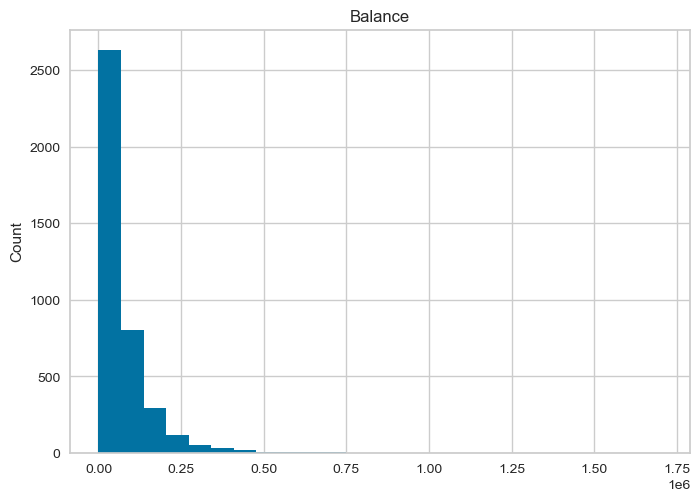

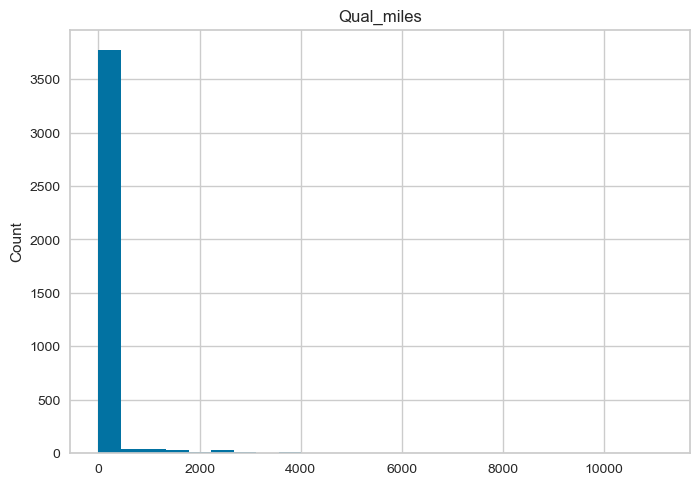

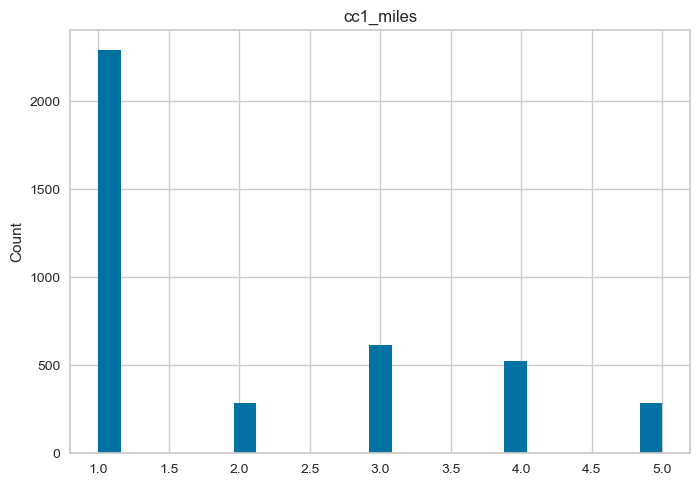

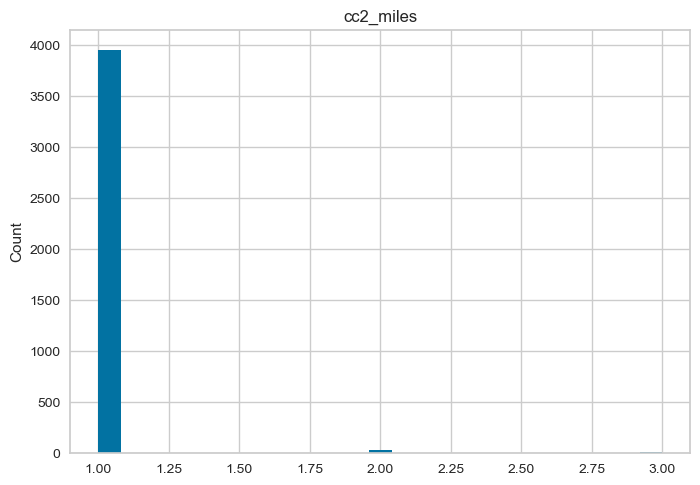

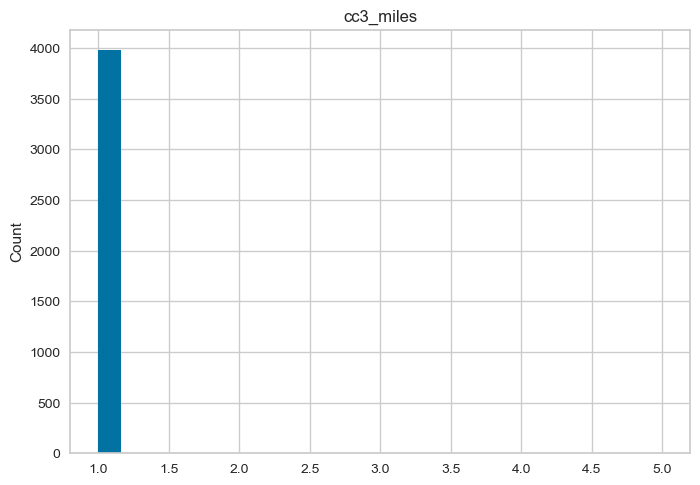

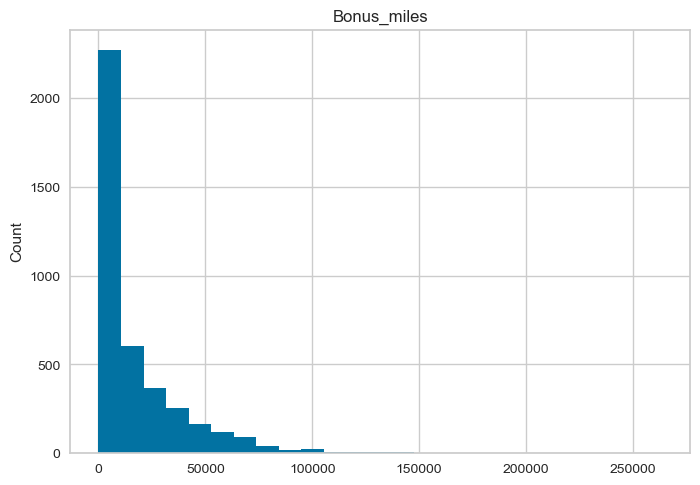

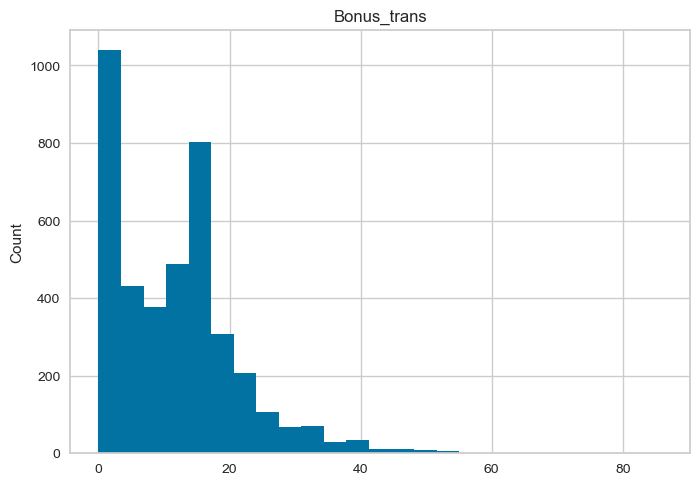

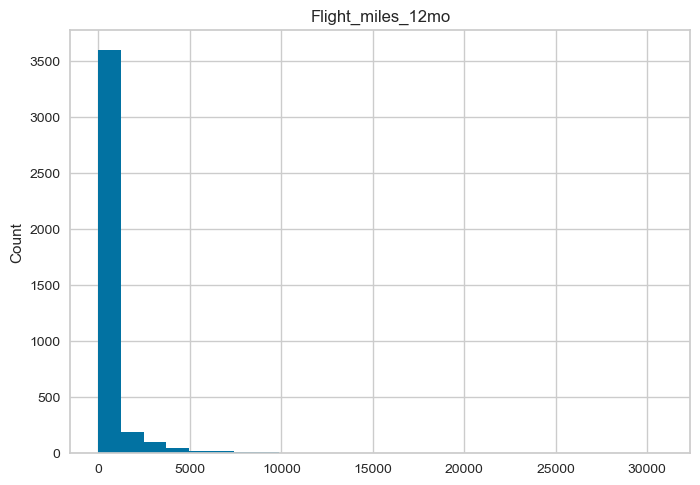

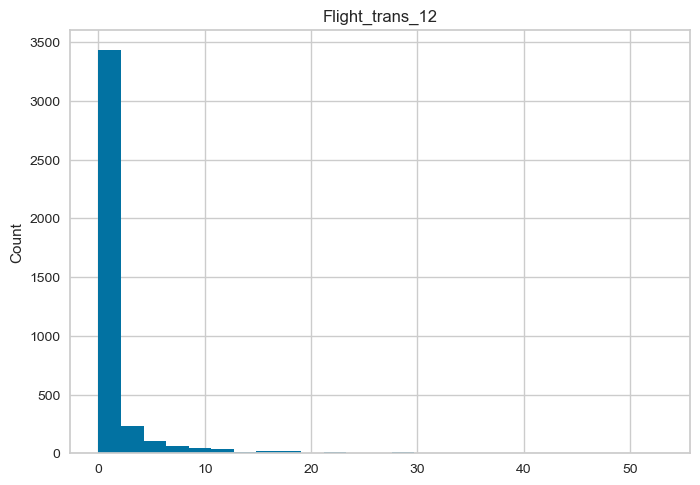

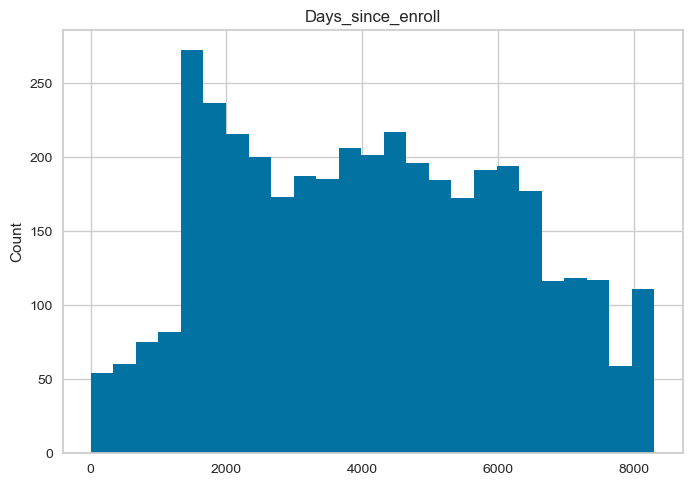

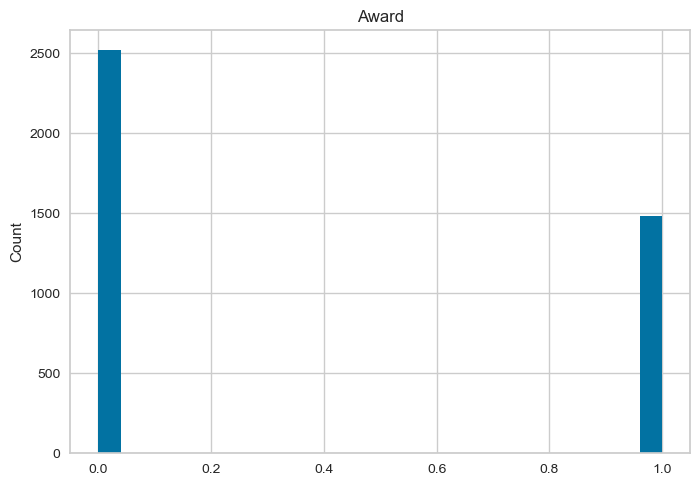

In [19]:
for feature in data.columns:
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


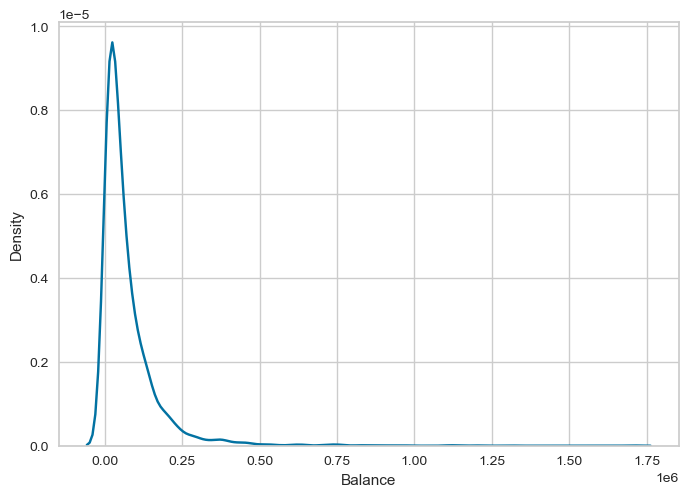

Qual_miles


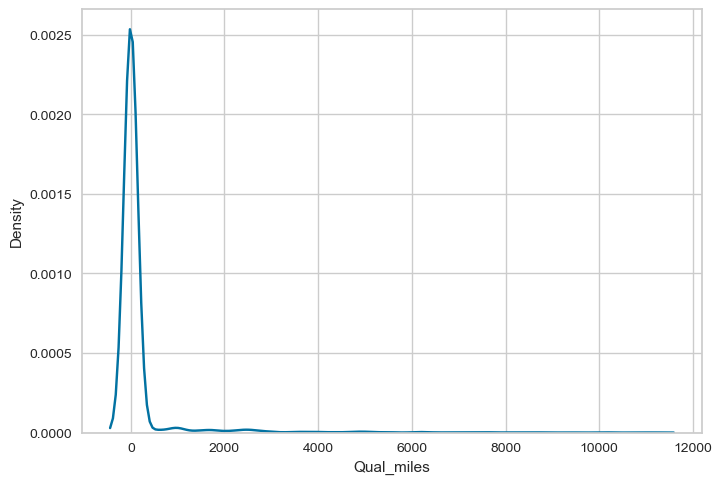

cc1_miles


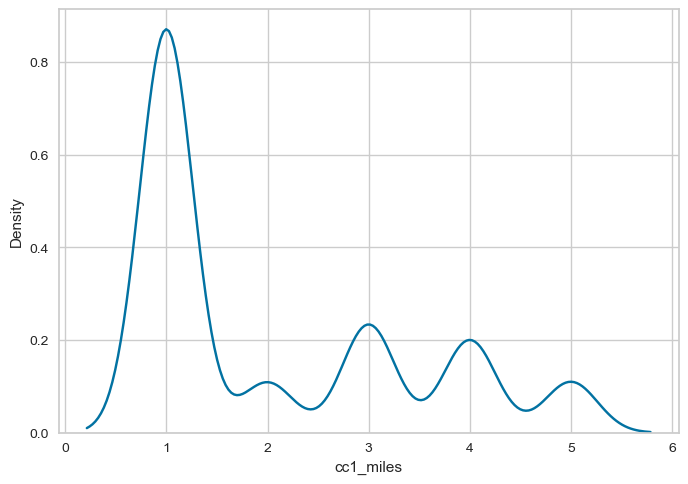

cc2_miles


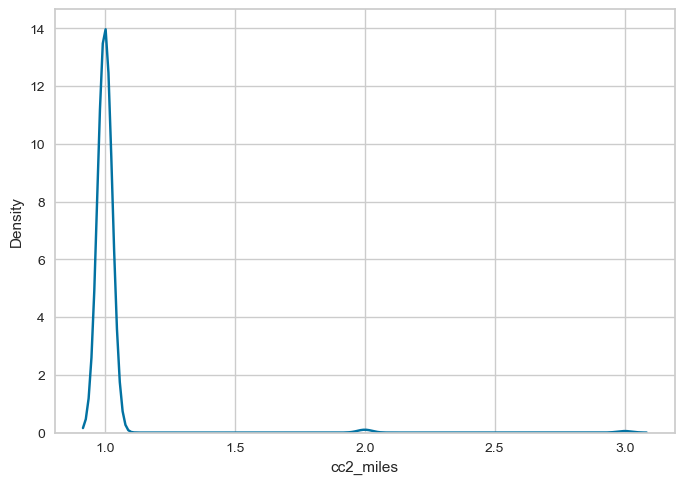

cc3_miles


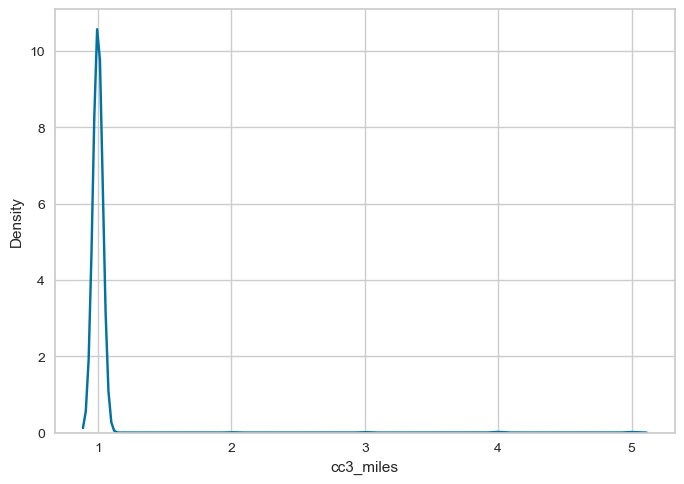

Bonus_miles


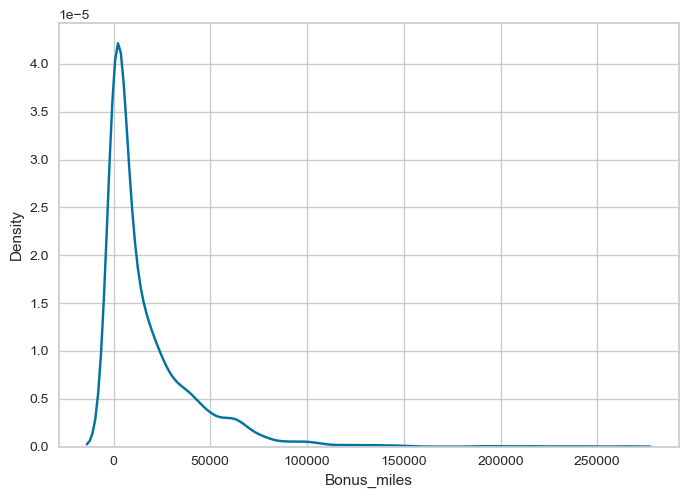

Bonus_trans


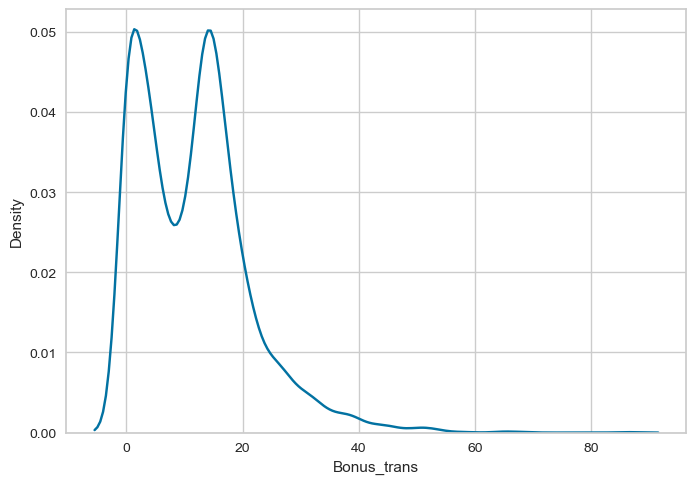

Flight_miles_12mo


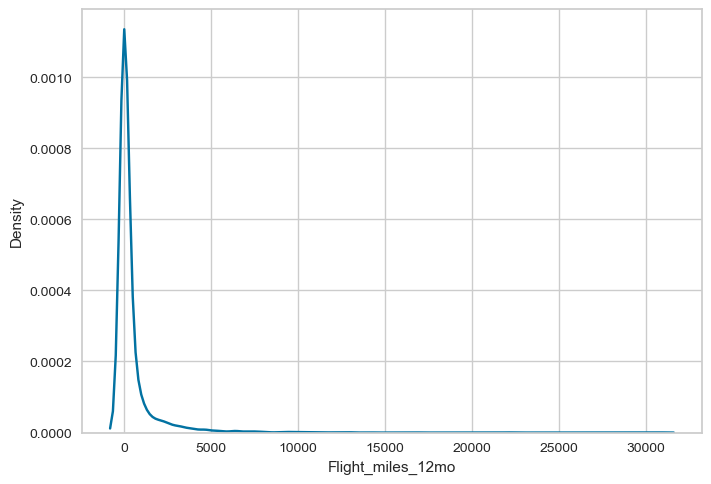

Flight_trans_12


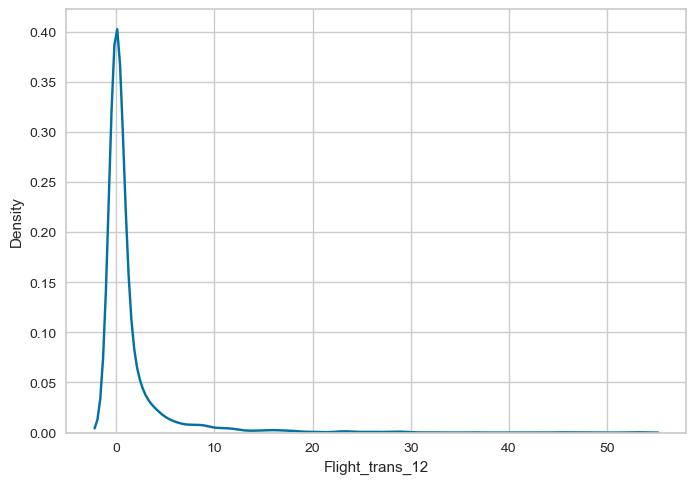

Days_since_enroll


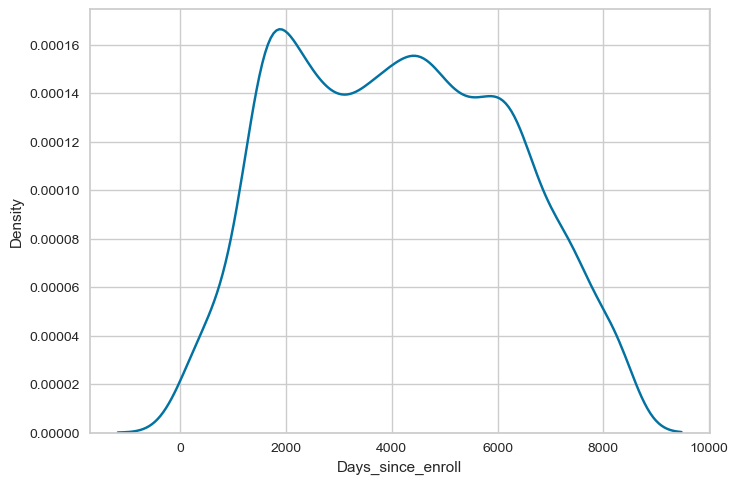

Award


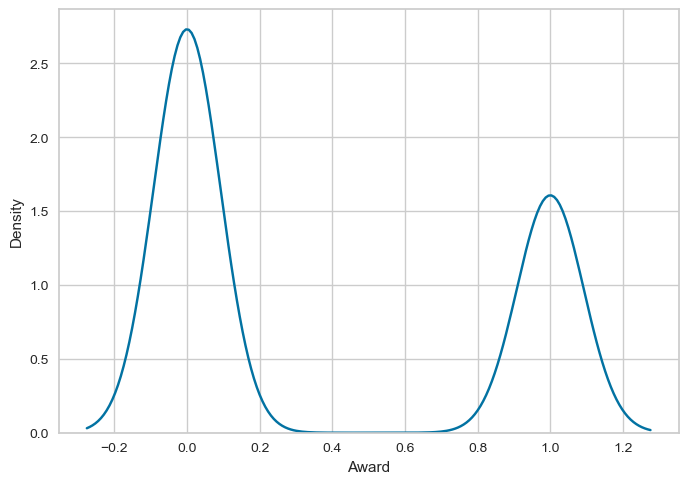

In [20]:
# Kernel Density for every feature, singled out
for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

### Outliers Detection

In [22]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

<Axes: xlabel='Days_since_enroll'>

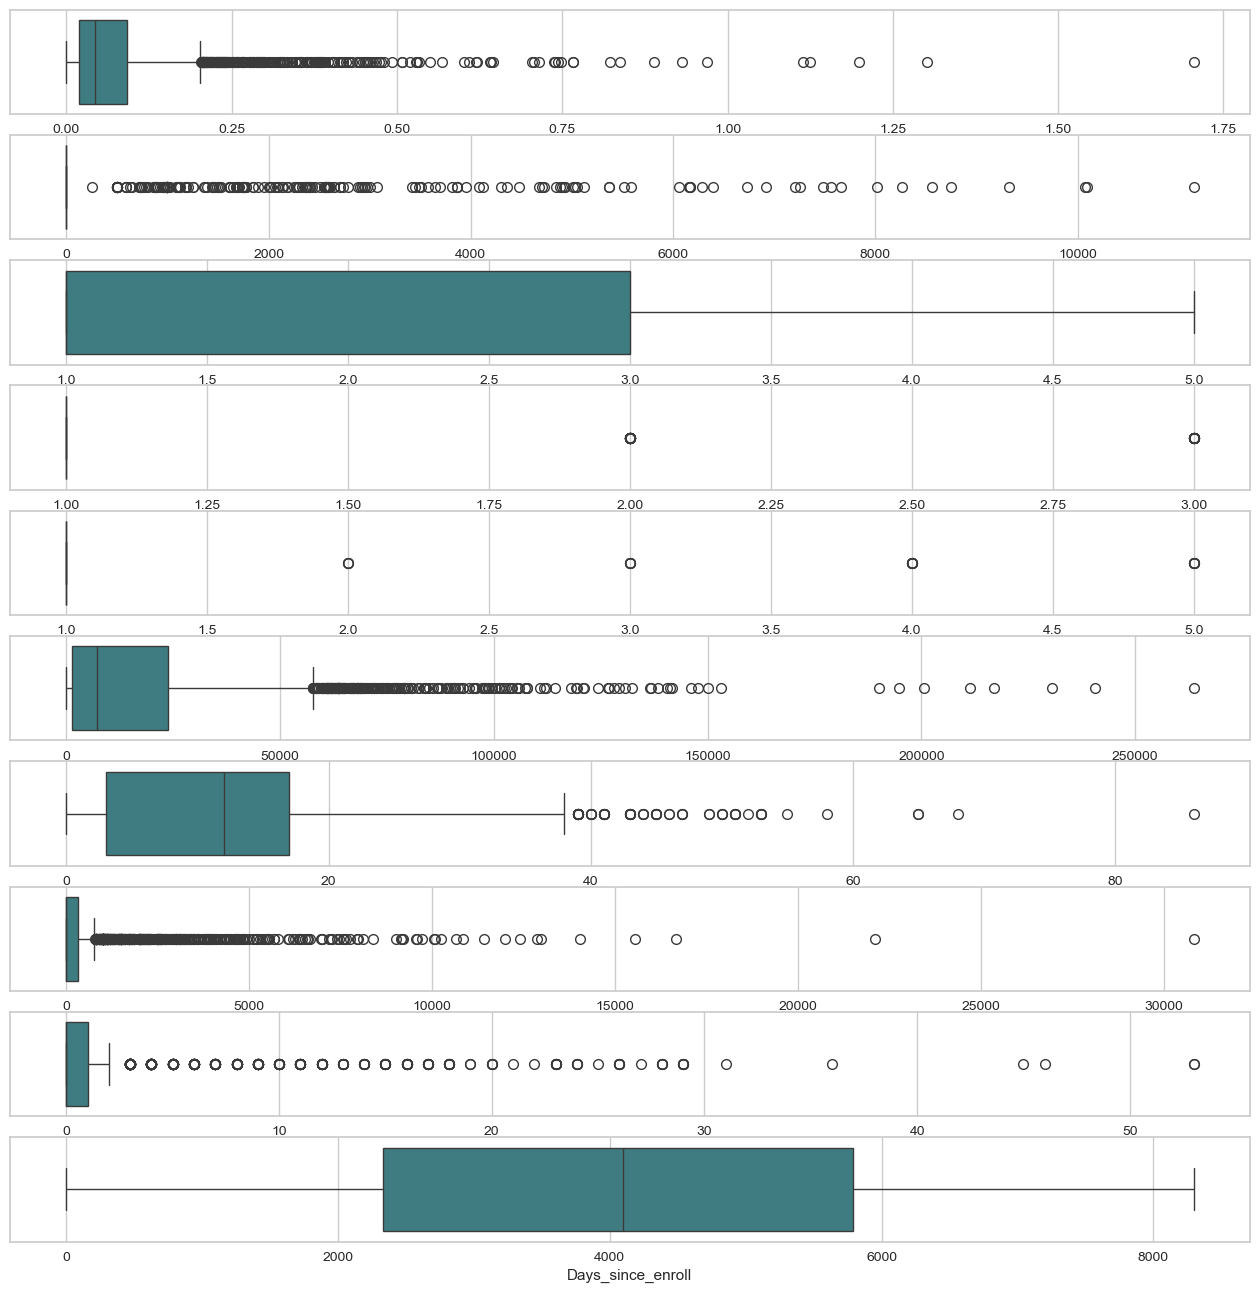

In [23]:
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=data,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=data,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=data,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=data,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=data,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=data,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=data,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=data,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=data,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=data,palette='crest',ax=axes[9])

<Axes: >

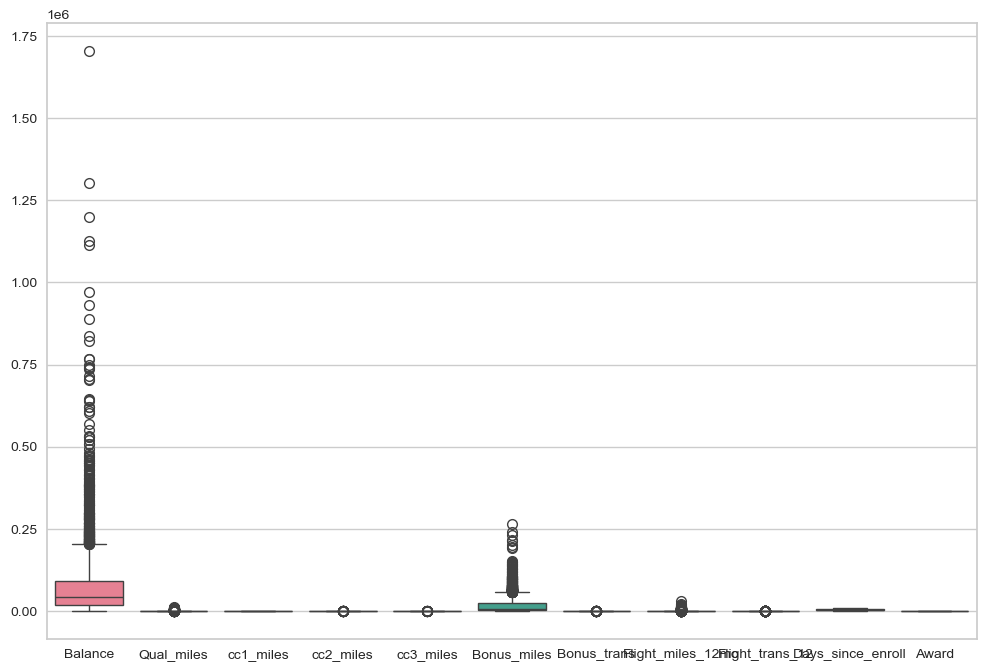

In [24]:
# Box plot for every feature in the same graph
plt.figure(figsize=(12,8))
sns.boxplot(data=data)

<Axes: >

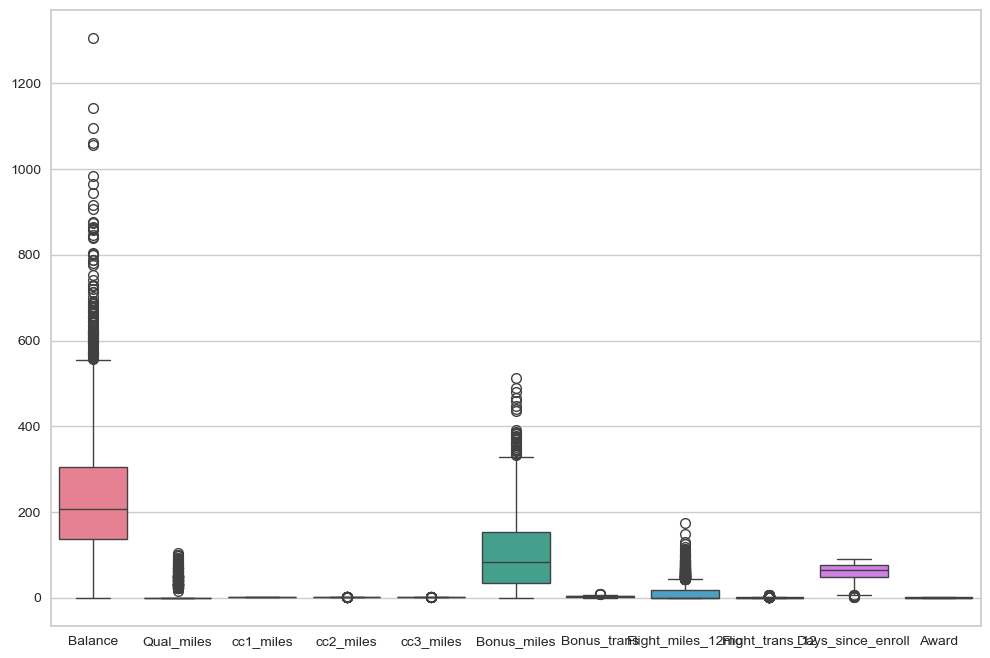

In [25]:
# we use sqrt() to see more clearly despite the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

### Data Visualization

In [27]:
countNoTermDeposit = len(data[data.Award==0])
countHaveTermDeposit = len(data[data.Award==1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNoTermDeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((countHaveTermDeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.96%
Percentage of Customer does have a Award: 37.04%


Text(0.5, 1.0, 'Whether the Client has an Award or not')

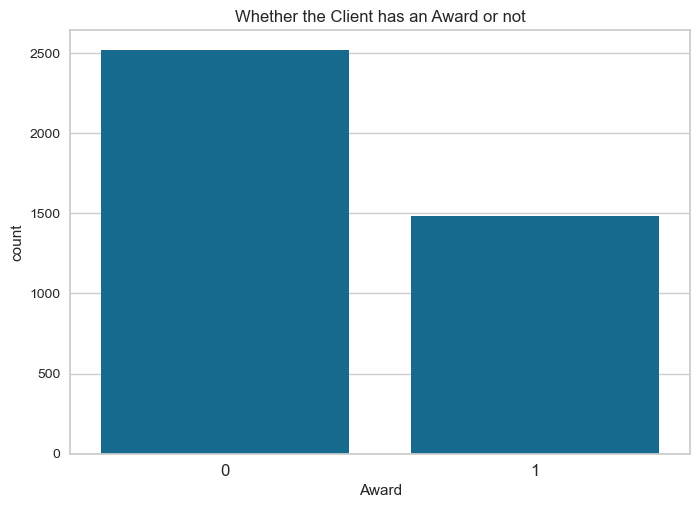

In [28]:
sns.countplot(x='Award',data=data, order=data['Award'].value_counts().index)
plt.xticks(fontsize=12)
plt.title('Whether the Client has an Award or not')

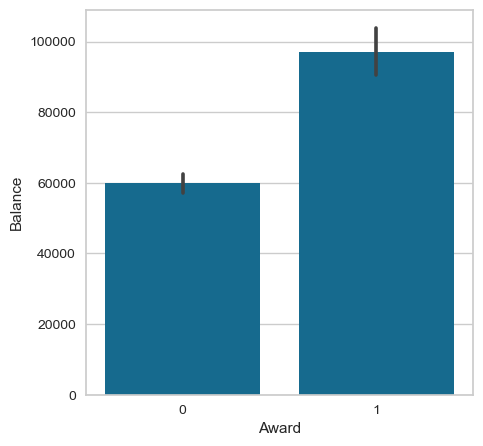

In [29]:
# Balance : Number of miles eligible for award travel
plt.figure(figsize=(5,5))
Balance = data[['Award','Balance']].sort_values('Balance',ascending=False)
ax = sns.barplot(x='Award',y='Balance',data=Balance)
ax.set(xlabel='Award',ylabel='Balance')
plt.show()

In [30]:
# what is correlated with Balance?
corr_matrix = data.corr()
corr_matrix['Balance'].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
Award                0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
Name: Balance, dtype: float64

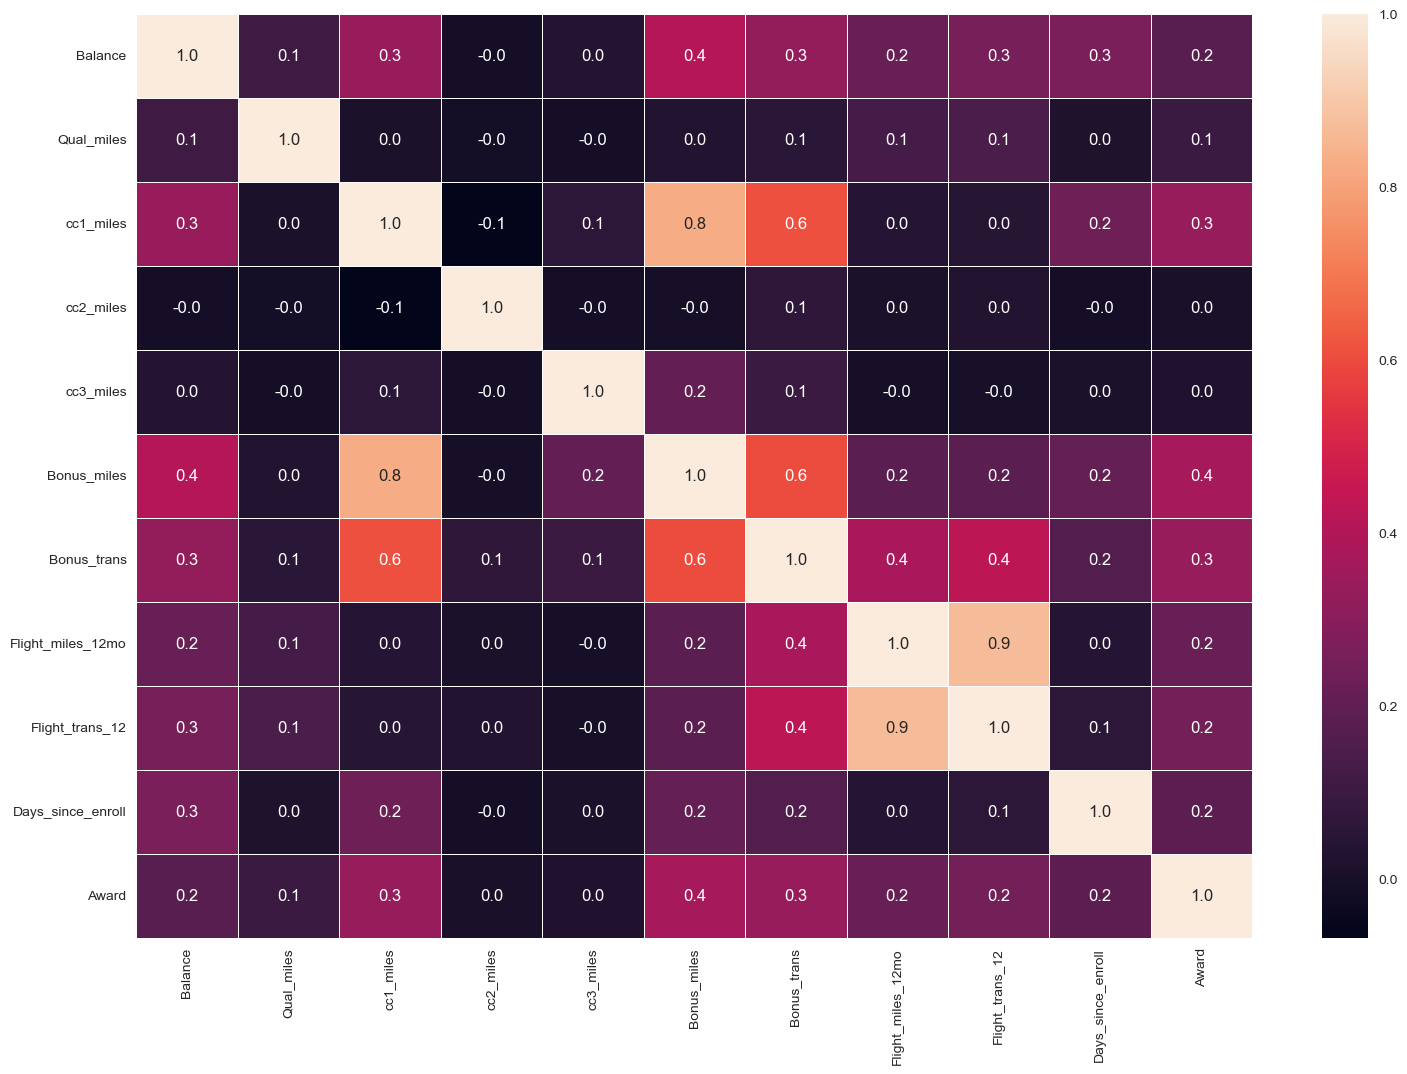

In [31]:
# correlation heatmap
f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

Unique points in this correlation matrix:

+ flight_trans_12 is positively correlated with flight_miles_12mo
+ bonus_trans is positively correlated with cc1_miles
+ bonus_trans is positively correlated with bonus_miles
+ bonus_miles is positively correlated with cc1_miles

In other words, the following are positively correlated

+ Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
+ Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
+ Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
+ Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

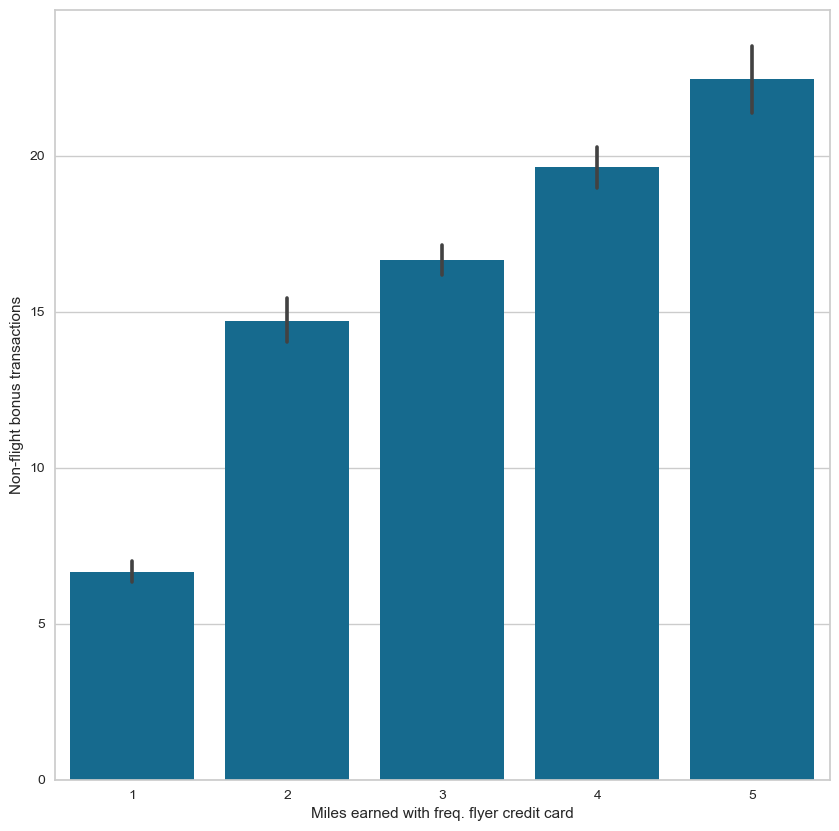

In [33]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize=(10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans',ascending=False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

#### People who fly more frequently use bonus transactions more
## Data Preprocessing

### Standardizing the Data

In [35]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3998, 11)

In [36]:
#  Normalizing the data
# Using Minmaxscaler for accuracy result comparison
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 11)

### KMeans Clustering
After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot.
#### Elbow Method for Determining Cluster Amount
#### Standard Scaler Applied on Data

In [38]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centorids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,43978.000000
1,2,35402.348376
2,3,30899.274206
3,4,27149.891334
4,5,24884.782146
5,6,21753.672237
6,7,18888.722527
7,8,17315.821745
8,9,15965.119273
9,10,14725.448805


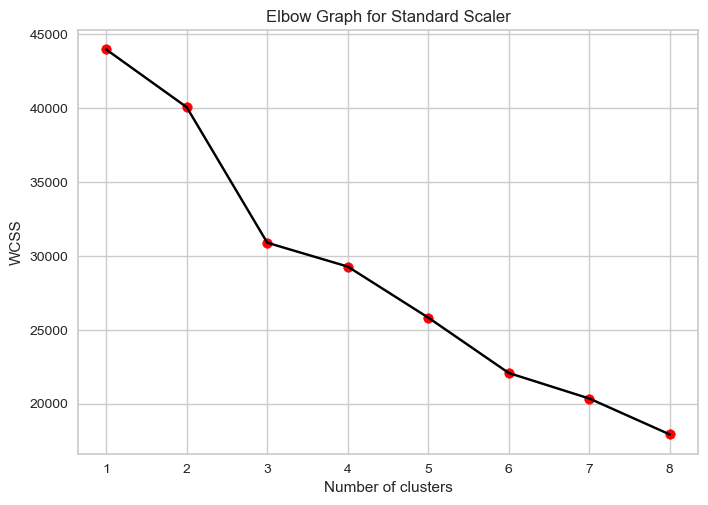

In [39]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color='black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score
Internal measures for cluster validation

+ The goal of partitioning clustering algorithms is to split the data set into clusters of objects, such that:

the objects in the same cluster are similar as much as possible,
and the objects in different clusters are highly distinct
That is, we want the average distance within cluster to be as small as possible; and the average distance between clusters to be as large as possible.

Internal validation measures reflect often the compactness, the connectedness and the separation of the cluster partitions.

+ Compactness or cluster cohesion: Measures how close are the objects within the same cluster. A lower within-cluster variation is an indicator of a good compactness (i.e., a good clustering). The different indices for evaluating the compactness of clusters are base on distance measures such as the cluster-wise within average/median distances between observations.
+ Separation: Measures how well-separated a cluster is from other clusters. The indices used as separation measures include:
distances between cluster centers
the pairwise minimum distances between objects in different clusters
+ Connectivity: corresponds to what extent items are placed in the same cluster as their nearest neighbors in the data space. The connectivity has a value between 0 and infinity and should be minimized.
Generally most of the indices used for internal clustering validation combine compactness and separation measures as follow:

Index=(α×Separation)(β×Compactness)

Where α and β are weights.

In this section, we’ll describe the two commonly used indices for assessing the goodness of clustering: the silhouette width and the Dunn index. These internal measure can be used also to determine the optimal number of clusters in the data.


### Silhouette Score
Silhouette coefficient

+ The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.

For each observation i, the silhouette width si is calculated as follows:

For each observation i, calculate the average dissimilarity ai between i and all other points of the cluster to which i belongs. \
For all other clusters C, to which i does not belong, calculate the average dissimilarity d(i,C) of i to all observations of C. The smallest of these d(i,C) is defined as bi=minCd(i,C). The value of bi can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., the nearest one to which it does not belong.
    

+ Finally the silhouette width of the observation i is defined by the formula: Si=(bi−ai)/max(ai,bi).\
Silhouette width can be interpreted as follow:

Observations with a large Si (almost 1) are very well clustered.\
A small Si (around 0) means that the observation lies between two clusters.\
Observations with a negative Si are probably placed in the wrong cluster.

In [42]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method 

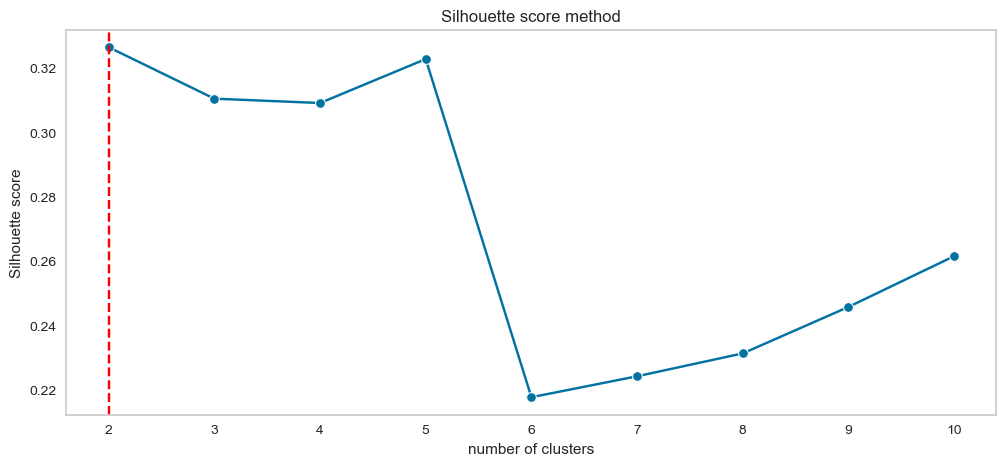

In [43]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

##### Silhouette score method indicates the best options would be respectively 2 clusters.

Elbow Plot for Standard Scaler data


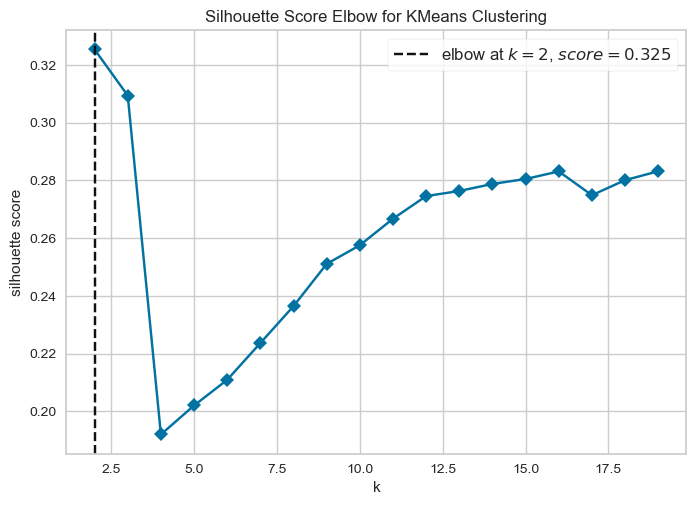

In [45]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500,init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model,k=(2,20),metric='silhouette',timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)    
visualizer.show()
plt.show()

In [46]:
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]
#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.32531882107641713
For n_clusters = 3 The average silhouette_score is : 0.311816432058236
For n_clusters = 4 The average silhouette_score is : 0.25804195972627175
For n_clusters = 5 The average silhouette_score is : 0.2684175427459057
For n_clusters = 6 The average silhouette_score is : 0.2786929895786359
For n_clusters = 7 The average silhouette_score is : 0.2658803828992113
For n_clusters = 8 The average silhouette_score is : 0.2815521815394947
For n_clusters = 9 The average silhouette_score is : 0.2985404317467821


####  Conclusion:
According the the silhouette score of:

The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.33

### Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset

In [49]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3998,)

In [50]:
# these are nothing but cluster labels...
y_predict_kmeans

array([3, 3, 3, ..., 0, 3, 3])

In [51]:
model_kmeans.labels_

array([3, 3, 3, ..., 0, 3, 3])

In [52]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-0.15454014,  0.12217999, -0.26696772, -0.09825429, -0.06277446,
        -0.26868135, -0.10378296, -0.02669382, -0.0200056 ,  0.05321852,
         1.29358266],
       [ 0.63342331, -0.01812529,  1.48279779, -0.09825429, -0.05149278,
         1.26219578,  0.83887122, -0.06349288, -0.06316076,  0.45961909,
         0.43705379],
       [ 1.25090741,  0.87885969,  0.16797064, -0.09825429, -0.06277446,
         0.73329949,  1.76964297,  3.89851127,  4.1491026 ,  0.28983145,
         0.93278205],
       [-0.30024402, -0.09333093, -0.54721966, -0.09825429, -0.06030727,
        -0.51386831, -0.46521673, -0.21534943, -0.23725874, -0.24103161,
        -0.76707163],
       [ 0.63950059, -0.08446932,  1.02183982, -0.09825429, 15.64433492,
         3.1793166 ,  1.7144102 ,  0.0332068 ,  0.05959833,  0.2395819 ,
         0.33731815],
       [-0.04706705, -0.15626333, -0.66838569,  9.03710982, -0.06277446,
        -0.1018366 ,  0.61758448,  0.08745745,  0.22023229, -0.0727739 ,
         0.051

In [53]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

21466.69769366579

In [54]:
#Assign clusters to the data set
df = pd.read_excel("C:/Users/tusha/Downloads/Clustering/Clustering/EastWestAirlines.xlsx", sheet_name='data')
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df.set_index('ID',inplace=True)

In [55]:
df.shape

(3999, 11)

In [56]:
df.duplicated().sum()

1

In [57]:
df = data.drop_duplicates()
df.duplicated().sum()

0

In [58]:
df['Kmeans_label'] = model_kmeans.labels_

In [59]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,
0,58046.613139,238.676399,1.692214,1.000000,1.000000,10660.628954,10.608273,422.794404,1.298054,4229.072993,0.995134
1,137448.997797,130.127753,4.101322,1.000000,1.002203,47630.462555,19.659692,371.268722,1.134361,5068.188326,0.581498
2,199672.328358,824.089552,2.291045,1.000000,1.000000,34857.910448,28.597015,5918.828358,17.111940,4717.619403,0.820896
3,43364.160405,71.944123,1.306358,1.000000,1.000482,4739.500000,7.137765,158.640655,0.473988,3621.520231,0.000000
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


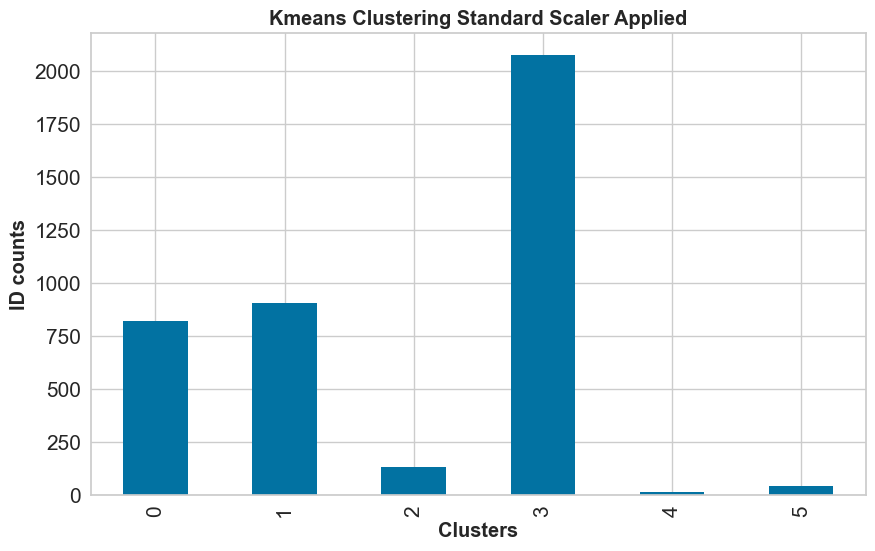

In [60]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Kmeans_label']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [62]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,1830.468023
1,2,823.558363
2,3,625.110961
3,4,436.642089
4,5,348.934750
5,6,315.307024
6,7,287.722190
7,8,263.039920
8,9,243.906994
9,10,226.104455


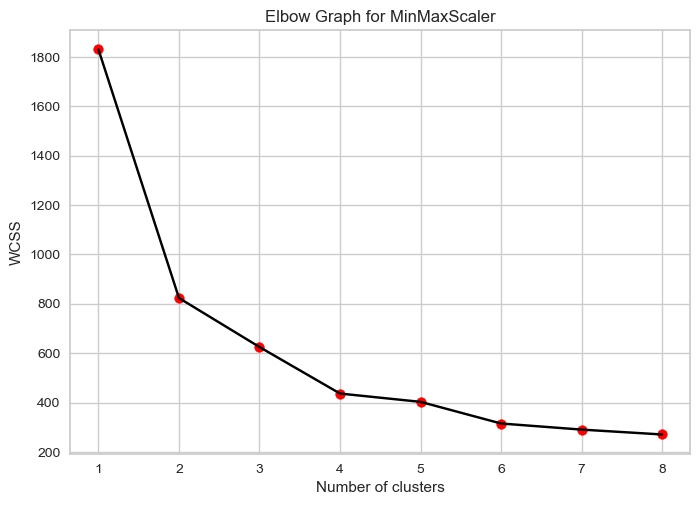

In [63]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

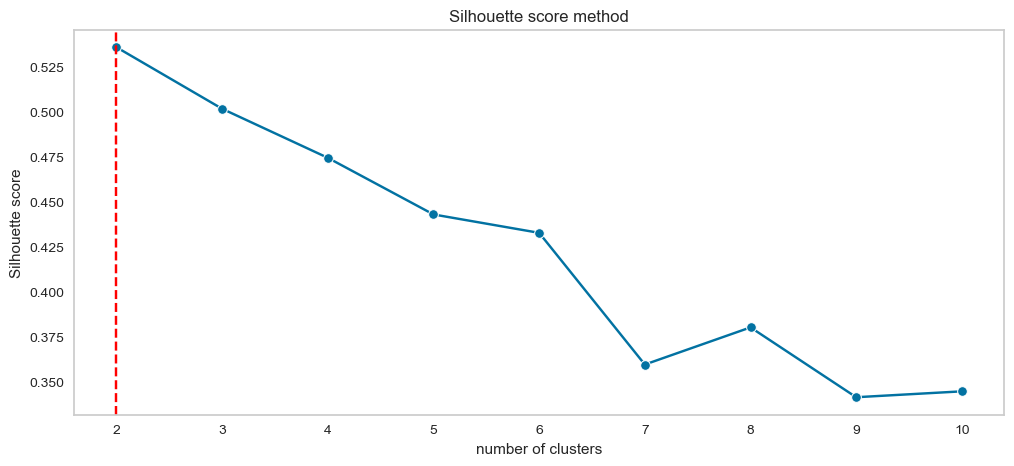

In [64]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


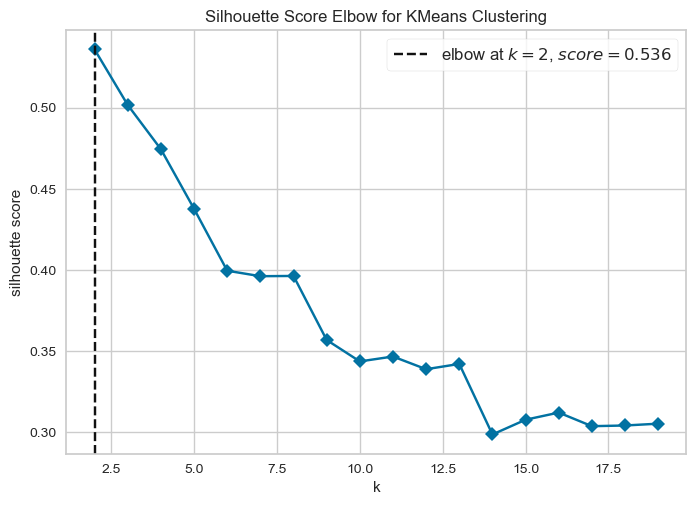

In [65]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [66]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535888544052936
For n_clusters = 3 The average silhouette_score is : 0.501696654172297
For n_clusters = 4 The average silhouette_score is : 0.4744510159308416
For n_clusters = 5 The average silhouette_score is : 0.4429787795230887
For n_clusters = 6 The average silhouette_score is : 0.3986533923663534
For n_clusters = 7 The average silhouette_score is : 0.3935291814349879
For n_clusters = 8 The average silhouette_score is : 0.39524825038544276
For n_clusters = 9 The average silhouette_score is : 0.35915290790179605


####  Conclusion:
According the the silhouette score of:

+ The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.53
### Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

In [68]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3998,)

In [69]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [70]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [71]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50949497e-02,  7.86125463e-03,  1.76400477e-01,
         6.95272149e-03,  2.18514104e-03,  3.88029372e-02,
         1.06355850e-01,  7.34601684e-03,  1.23162495e-02,
         4.60517912e-01, -6.99440506e-15]])

In [72]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

823.5583625482047

In [73]:
#Assign clusters to the data set
file_path = "C:/Users/tusha/Downloads/Clustering/Clustering/EastWestAirlines.xlsx"
# Load the excel file 
excel_file = pd.ExcelFile(file_path)
# List all sheet names
sheet_names = excel_file.sheet_names

# Load the second sheet (index 1)
df = pd.read_excel(file_path,sheet_name=sheet_names[1])
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df.set_index('ID',inplace=True)

In [74]:
df = data.drop_duplicates()
df.duplicated().sum()

0

In [75]:
df['Kmeans_label'] = model_kmeans.labels_

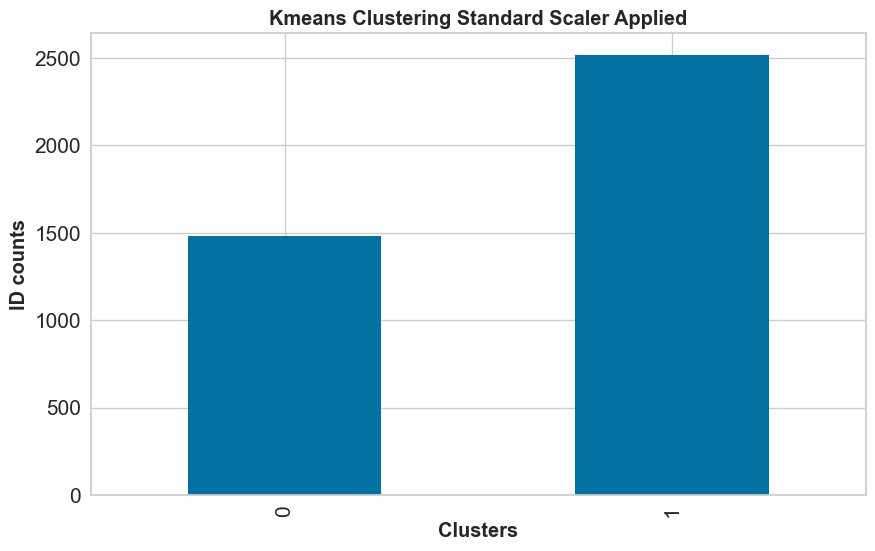

In [76]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Kmeans_label']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [77]:
# Group data by Clusters (K=2)
df.groupby('Kmeans_label').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0


#### We can now clearly see the 2 number of clusters formed, which can be described as under

+ Cluster1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers
+ Cluster0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers

### Hierarchical Clustering Algorithm

### What is Hierarchical Clustering?
+ Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

#### Types Of Hierarchical Clustering:
##### There are two types of hierarchical clustering:

+ <b>Agglomerative</b>: The data points are clustered using a bottom-up approach starting with individual data points.
+ <b>Divisive</b>: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.
#### The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. There are three key questions that need to be answered first:

How many numbers of cluster. Also deciding which transformation data we will use to build model.

Qiuck Notes:

linkage{“ward”, “complete”, “average”, “single”}, default=”ward” Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

ward minimizes the variance of the clusters being merged.

average uses the average of the distances of each observation of the two sets.

complete or maximum linkage uses the maximum distances between all observations of the two sets.

single uses the minimum of the distances between all observations of the two sets.

### Dendogram on MinMaxScaler Applied on Dataset

In [81]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

#for methods in ['single','complete','average','weighted','centroid','median','ward']: 
   
    #plt.figure(figsize =(20, 6)) 
    
    #dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    #plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    #Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [82]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

#### The seperation in Ward Method indicate that 2 is the optimal number for clusters.
<b>Ward</b> method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.
### Dendrogram on Standard Scaler Applied on Data

In [84]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2891560488062143
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8110876003700274
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8110876003700274
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562622335599249

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2939395016802131
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760498283333268
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838424148089893
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350131896585496

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.308036175465823
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985292155693238
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7730785441296635
For n_

#### Max score is with cluster numbers 2 in standard scaler transformation and in Min Max scaler transformation. 
+ Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

### PCA
#### Running PCA of standardized data.

In [214]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [215]:
print(pca_std.singular_values_)

[114.59929366  83.12095737  64.93711956  63.52257567  61.95910679
  60.39325992  56.7960262   49.8137685   37.95289819]


In [216]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[29.8626543  15.71034052  9.58849765  9.17530952  8.72920759  8.29356916
  7.33500521  5.64239286  3.27532512]


In [217]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([29.8626543 , 45.57299482, 55.16149247, 64.33680198, 73.06600957,
       81.35957873, 88.69458394, 94.3369768 , 97.61230192])

#### Conclusion:

by applying PCA on standardized data with 95% variance it gives 9 PCA components.
### Silhouette Score method for PCA Standard Scaled Data

In [219]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.19961390517290722
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8108617312271154
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8108617312271154
For n_clusters = 2 The average silhouette_score with linkage- single : 0.738309454714575

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2110441329212817
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7783994853820991
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7857918595410374
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7380319163788157

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.21497866326071854
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6685293540610888
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7754426734642426
For 

### Run Hierarchical Clustering.(Agglomerative Clustering)

In [221]:
agg_clustering = AgglomerativeClustering(n_clusters=10)
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3998,)


array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [222]:
# Clustering Score

(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

28.488

### Putting Cluster lables into original dataset And analysis of the same

In [224]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,Hierarchical_labels,DBSCAN_labels
ID,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,7,1


In [225]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,DBSCAN_labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,
0,35565.475331,1.895909,1.071600,1.000000,1.000000,2692.451264,5.929603,98.201564,0.332732,3485.887485,0.008424,0.991576,0.008424
1,106691.116046,9.482808,3.249284,1.000000,1.000000,27320.199140,16.641834,185.707736,0.547278,4667.399713,0.000000,1.000000,0.000000
2,59183.817881,34.030905,2.355408,1.000000,1.000000,18106.241722,11.897351,183.070640,0.584989,4365.253863,1.000000,0.000000,1.000000
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.604651,0.395349
4,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000,0.500000,0.500000
5,145767.807692,483.692308,2.576923,1.000000,1.000000,41204.115385,35.596154,8882.211538,23.326923,4557.961538,0.865385,0.134615,0.865385
6,107778.330769,3553.684615,1.884615,1.000000,1.000000,17001.907692,11.276923,764.107692,2.384615,4091.761538,0.530769,0.469231,0.530769
7,123897.501873,59.329588,4.464419,1.000000,1.000000,66245.951311,24.352060,1014.719101,3.112360,5494.797753,0.988764,0.011236,0.988764


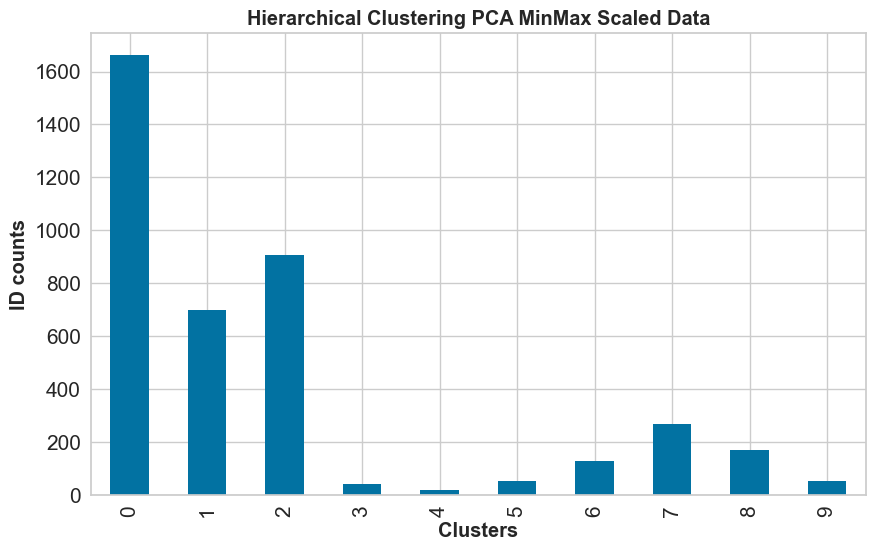

In [226]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Running PCA of MinMaxscalar data.

In [228]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [229]:
# eigenvalues..

print(pca_minmax.singular_values_)

[32.61283384 20.38274997 14.94964196  6.55127594]


In [230]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[58.10519044 22.69673608 12.20954379  2.34471271]


#### Conclusion:

By applying PCA on MinMaxscalr transformation data gives 4 PCA components.
### Silhouette Score method for PCA MinMax Scaled Data

In [232]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = sil(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5570203113320763
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4506283560450683
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4746720886833248
For n_clusters = 2 The average silhouette_score with linkage- single : 0.5570203113320763

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4668018757689698
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5527079342536565
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5545201621845234
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5557695658754249

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4605211923296593
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5094913328407771
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4979294044354532
For n

<b>Conclusion</b>: Max score is with cluster numbers 2 for ward and mostly others.
### Run Hierarchical Clustering.(Agglomerative Clustering)

In [234]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(3998,)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [235]:
# Clustering Score

(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

55.702

### Putting Cluster lables into original dataset And analysis of the same

In [237]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,Hierarchical_labels,DBSCAN_labels
ID,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1


In [238]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,DBSCAN_labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,
0,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0,1.0,0.0
1,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,0.0,1.0


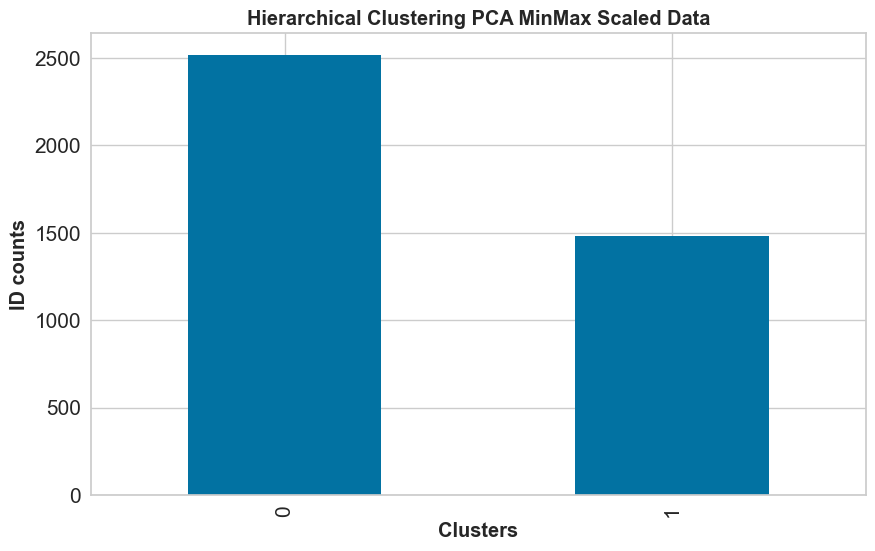

In [239]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### DBSCAN of Standard Scaled Data
##### To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [241]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [242]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

##### Collecting number of generated clusters.

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


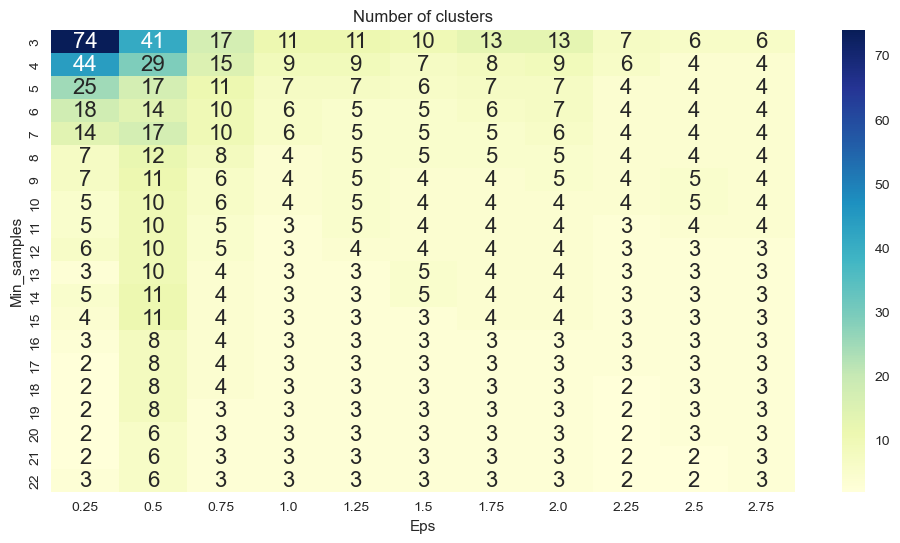

In [244]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

##### As the heatplot above shows, the number of clusters vary from 74 to 2.

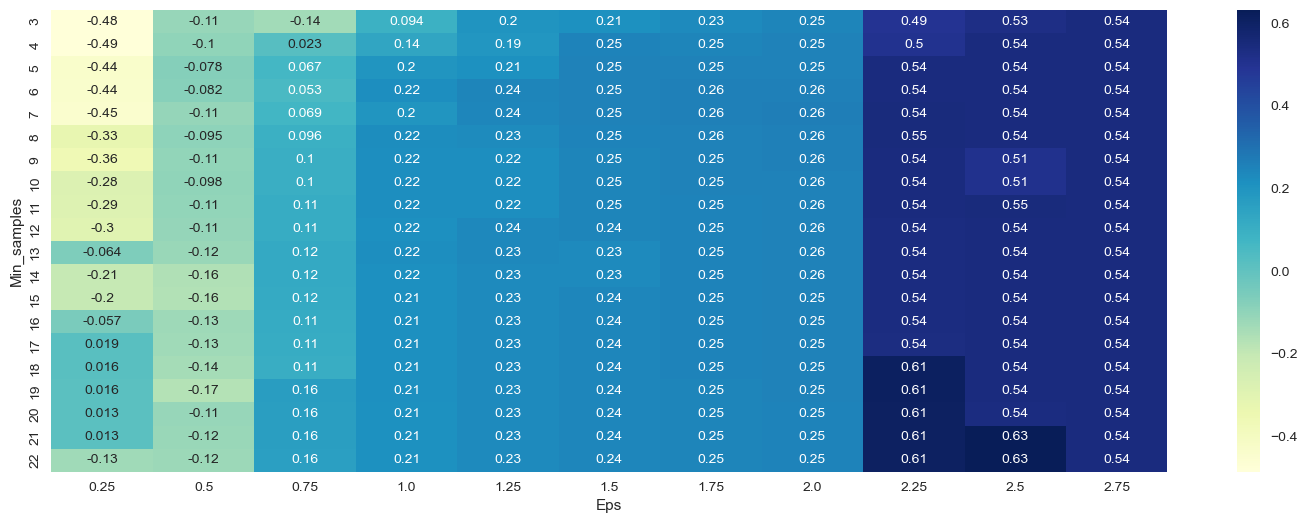

In [246]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

##### Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22

In [248]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


##### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [250]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [251]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [252]:
# -1 are the noise points in our dataset and the rest are the clusters

In [253]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,Hierarchical_labels,DBSCAN_labels
ID,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0


In [254]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,,
-1,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,0.312500,0.687500
0,66025.489182,68.500792,2.035092,1.000000,1.000000,15602.254090,10.883113,305.613193,0.925330,4083.549868,0.353034,0.646966,0.353034


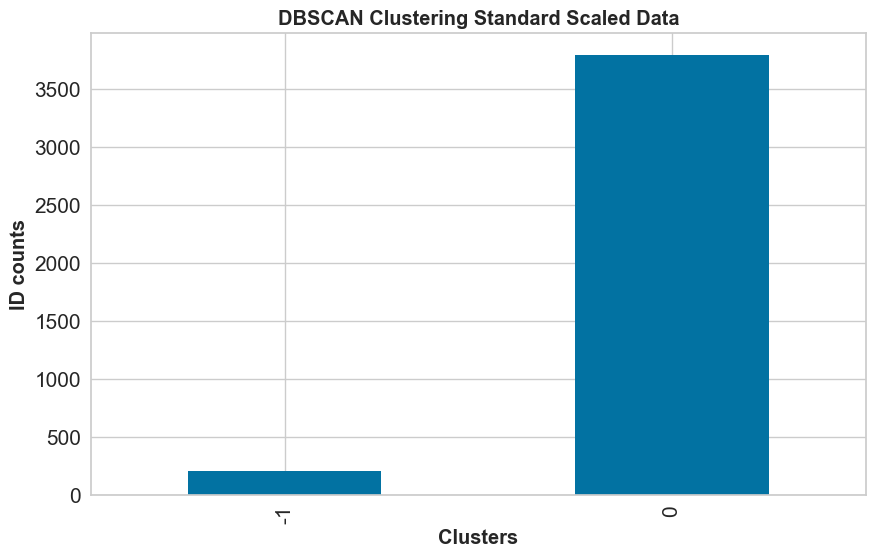

In [255]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['DBSCAN_labels']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### 8.2 DBSCAN on MinMax Scaled Data<a class="anchor" id="8.2"></a>
##### To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [257]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [258]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

##### Collecting number of generated clusters.

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


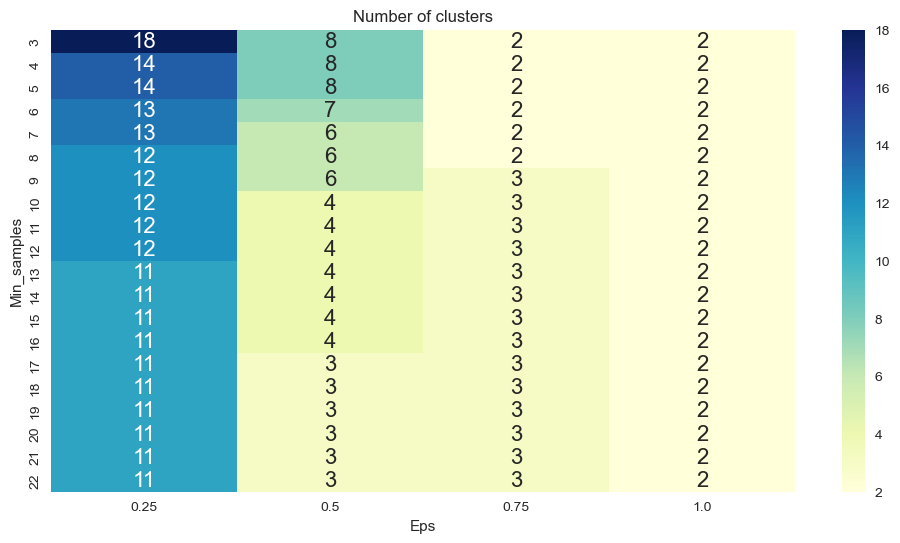

In [260]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

##### As the heatplot above shows, the number of clusters vary from 18 to 2.

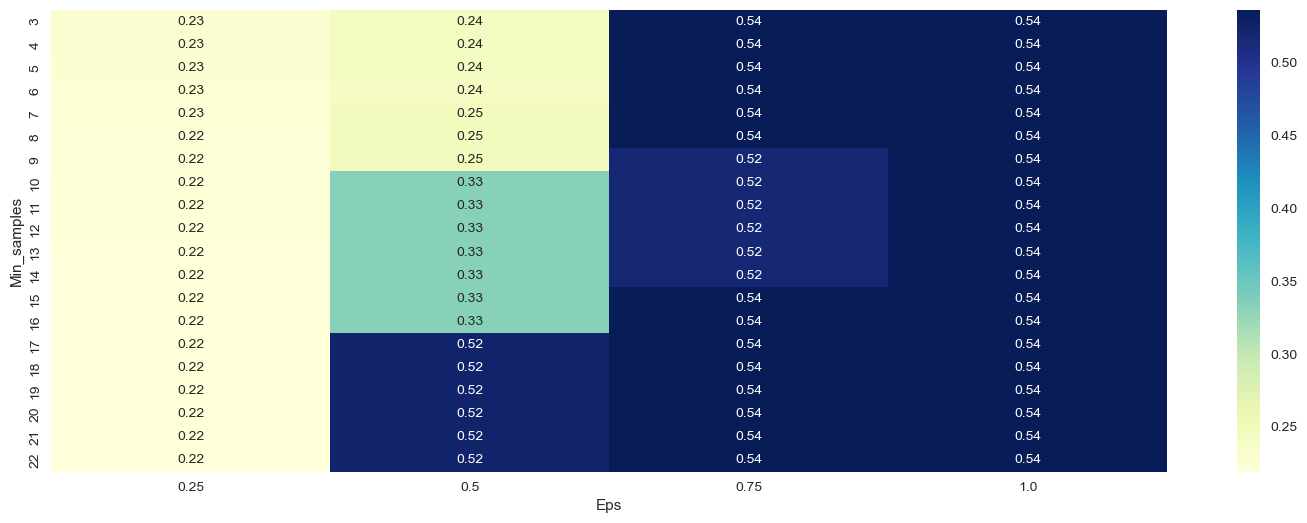

In [262]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

##### Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3

In [264]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


In [265]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


##### Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values

In [267]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(eps=1, min_samples=22)

In [268]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [269]:
# -1 are the noise points in our dataset and the rest are the clusters

In [270]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,Hierarchical_labels,DBSCAN_labels
ID,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1


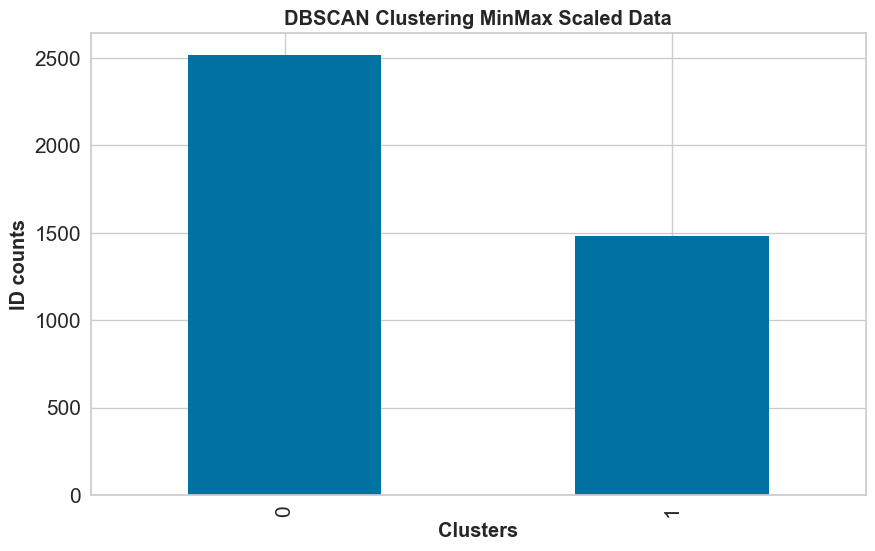

In [271]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['DBSCAN_labels']).size().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Conclusion:

In cluster number 0 & 1 there are more customers. Need to focus on cluster 0 & 1.

In [273]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [274]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Balance,59831.203814,97053.051317
Qual_miles,87.637267,240.196489
cc1_miles,1.705602,2.661715
cc2_miles,1.013905,1.015530
cc3_miles,1.008741,1.018231
Bonus_miles,10231.752483,28905.414585
Bonus_trans,9.146603,15.782579
Flight_miles_12mo,226.382201,857.501013
Flight_trans_12,0.652761,2.599595
Days_since_enroll,3821.535558,4625.062120


Conclusion :

As decided need to focous on first two clusters..
Considering past Award status(0 or 1) cluster number2 shows award avg as 1 that means people awarded with scheme.
Similarly for cluster number 2 award avg. is 0. Since avg is low that means now maximim award given to cluster number1 in the past. Need to add future schemes for cluster number two members on different bonus points & different card transaction bonus.

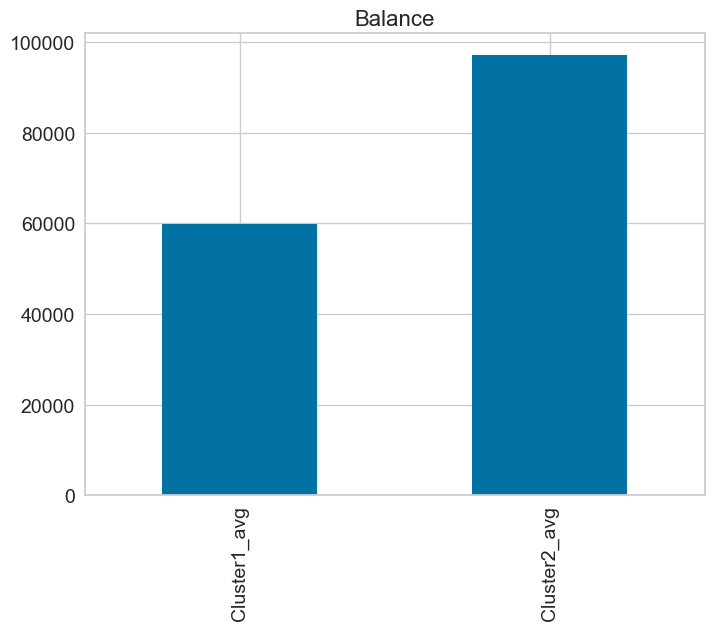

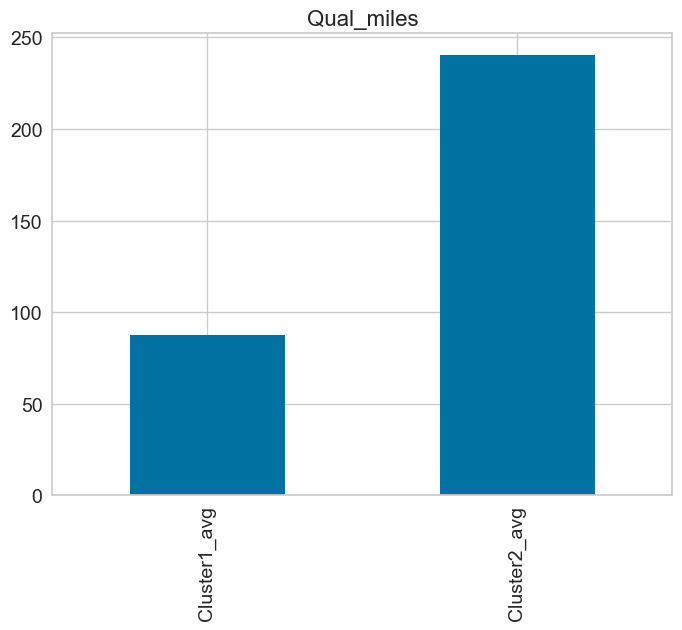

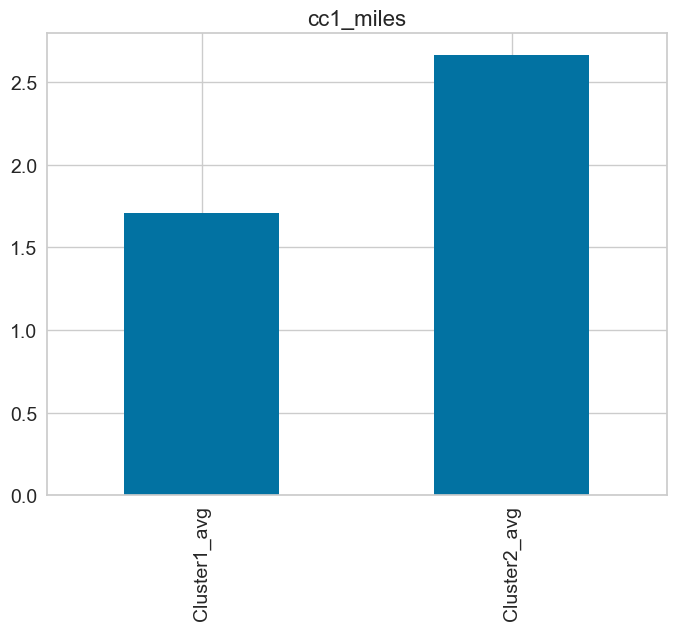

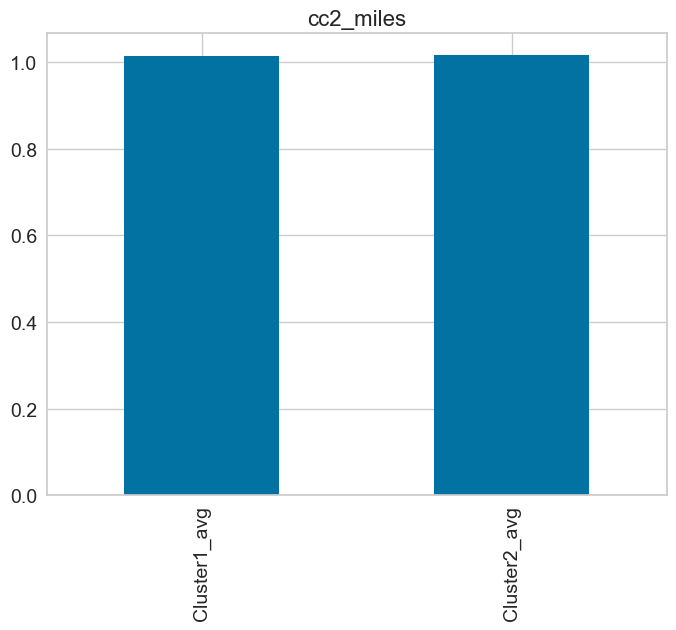

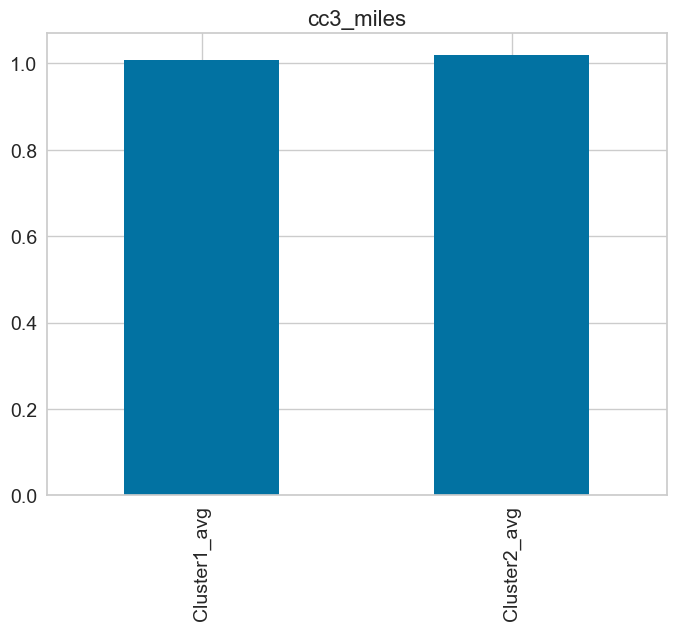

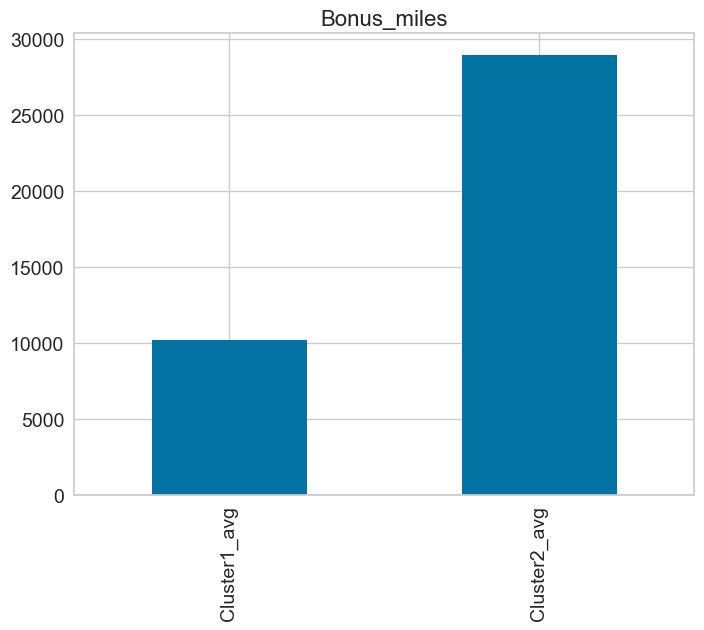

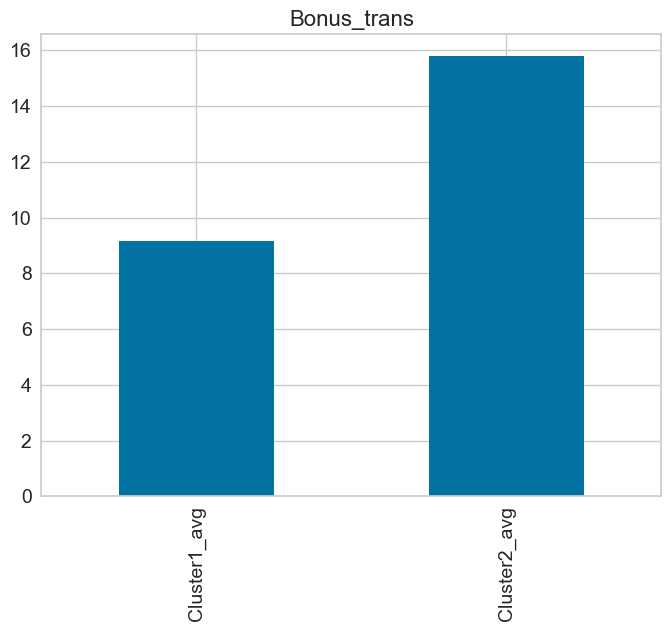

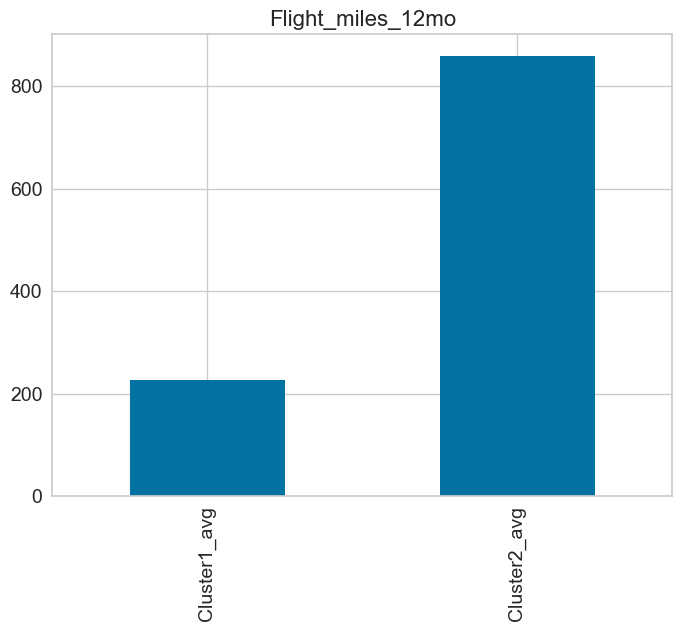

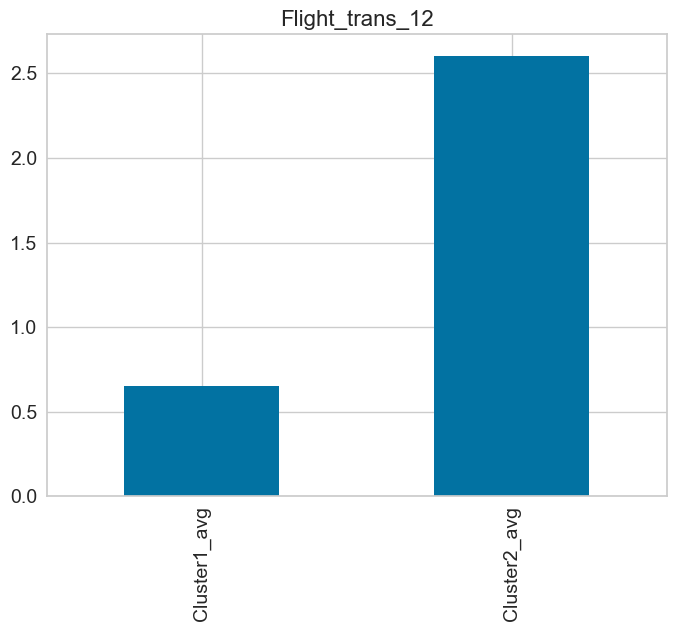

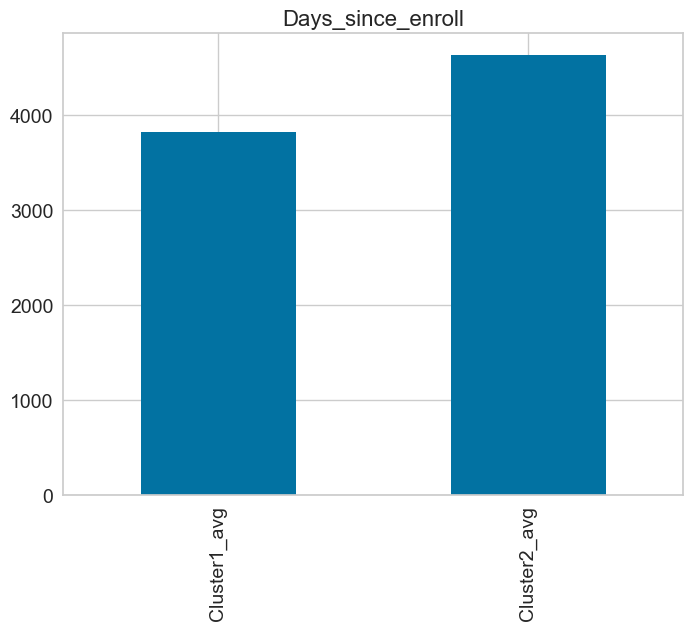

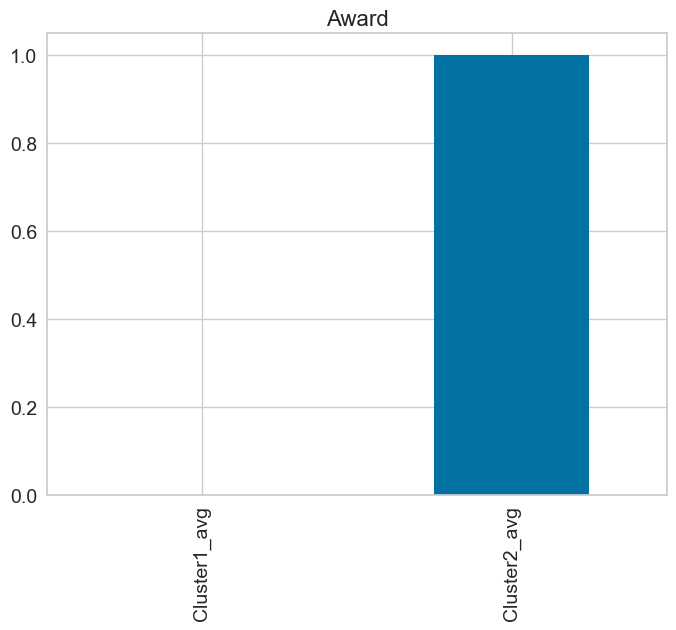

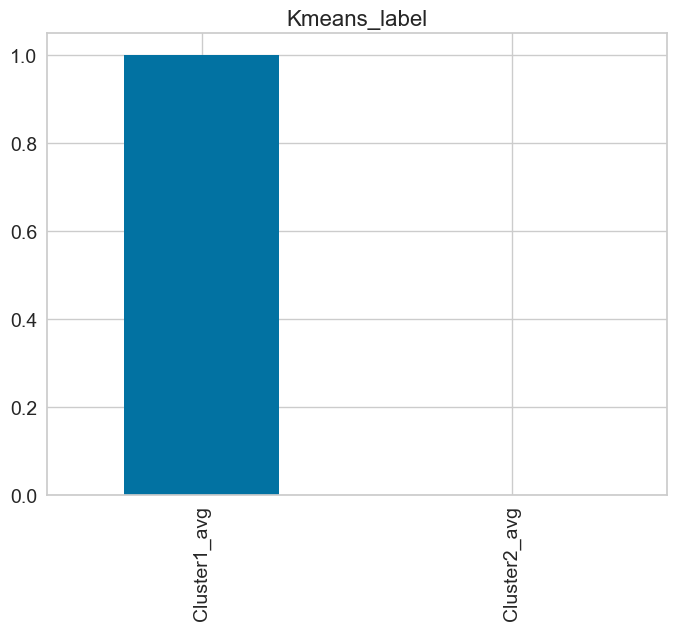

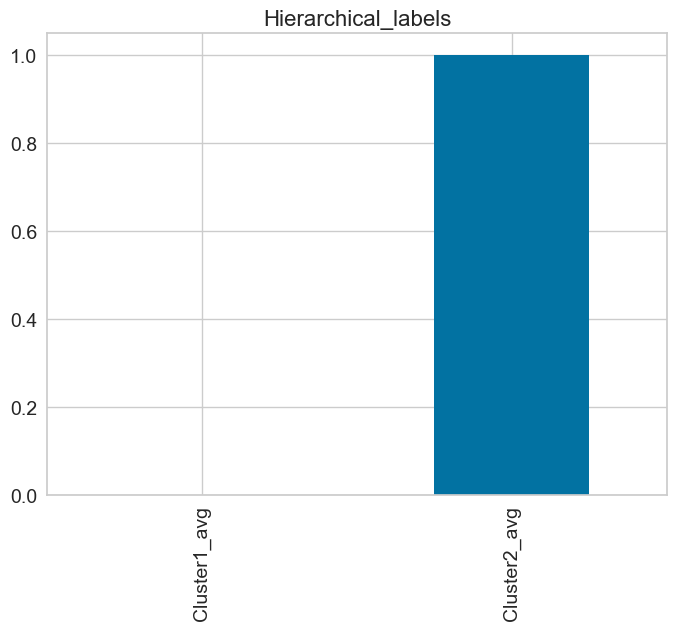

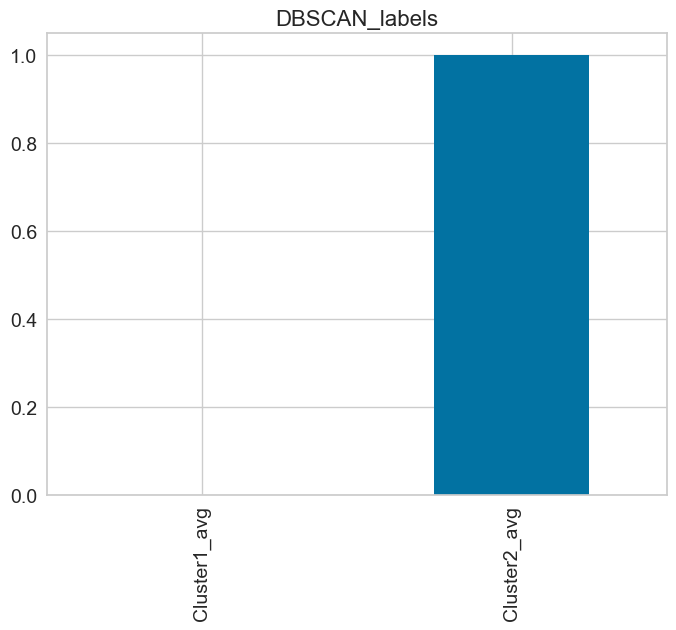

In [276]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

# 9. Conclusion:<a class="anchor" id="9"></a>

##### I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
##### Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
##### I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.

##### By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.

##### KMeans clustering is sensitive to outliers